# Coding Oscillation Probability from the Given Equation

In Project Guideline:

$$
P(v_{\mu} \rightarrow v_{\mu}) = 1-{sin}^2(2\theta_{23}){sin}^2(\frac{1.267\Delta m^2_{23}L}{E})
$$ 

Where $\theta_{23}$ is the mixing angle - determines the amplitude of neutrino oscillation probability and $\Delta m^2_{23}$ in $(eV^2)$ is the difference between the squared masses of the two neutrinos (determines frequency of oscillations)

Taking initial values as $\theta_{23} = \frac{\pi}{4},\Delta m^2_{23} - 2.4 \times 10^{-3} $ and $L=295$

This equation dictates the survival probability of a muon neutrino of energy E (GeV) as it travels as distance L (km). 

Translation: the probability that the muon neutrino will not undergo a flavour change (i.e oscillate) into a tao or electron neutrino, therefore staying as an observable muon neutrino

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from data_load import load_data
data, flux = [], []
data, flux = load_data()


E = np.linspace(0, 10, 200) 
dE = 10.0 / 200.0                              

# using bin centres to avoid E=0 issue in oscillation formula
E_centre = E + dE*0.5

In [8]:
theta23 = np.pi/4              
dm2  = 2.4e-3                   
L = 295                   


E = np.array(E_centre)
arg = 1.267 * dm2 * L / E
prob_mumu = 1 - (np.sin(2*theta23))**2*(np.sin(arg))**2
#print(prob_mumu)

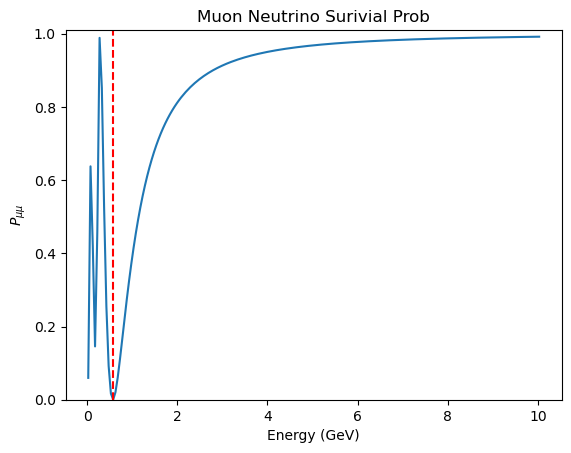

In [9]:
plt.plot(E_centre, prob_mumu)
plt.xlabel('Energy (GeV)')
plt.ylabel('$P_{\mu\mu}$')
plt.title('Muon Neutrino Surivial Prob')
plt.ylim(0,1.01)
plt.axvline(0.58, color = 'red', linestyle = '--')
#plt.xlim(0.5,0.65)
plt.show()
plt.close()

We can see clearly that between 0 and 1GeV that we have some spikes and dips in probability, after that as energy increases the oscillations will get slower (due to 1/E in sin) and the surivival probability then climbs back up to 1 slowly.

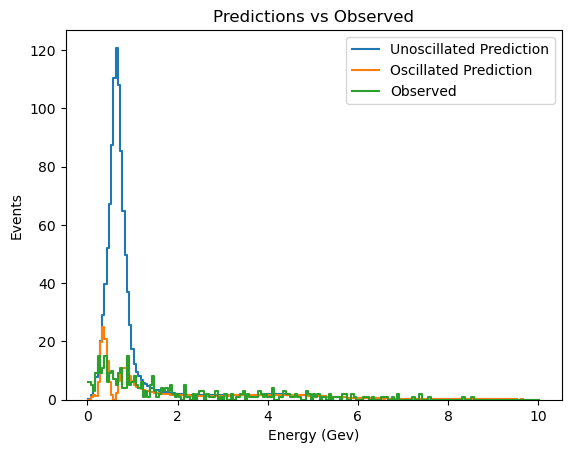

In [10]:
# oscillation probability applied to simulated flux

lambda_i = flux * prob_mumu

plt.step(E, flux, where = 'post', label = 'Unoscillated Prediction')
plt.step(E, lambda_i, where = 'post', label = 'Oscillated Prediction')
plt.step(E, data, where = 'post', label = 'Observed')
plt.xlabel('Energy (Gev)')
plt.ylabel('Events')
plt.ylim(0)
plt.title('Predictions vs Observed')
plt.legend()
plt.show()
plt.close()


We can see here that the oscillated flux matches with the observed data much more than the Unoscillated flux in terms of events and shape (dips, vague peaks).

By eye we can see that the survival probability graph hits ~0 at around 0.58GeV therefore the sin^2 term containing $\Delta m^2_{23}$ must be equal to 1 and the argument must be equal to $\frac{\pi}{2}$. The calculation for this will be done in the code cell below, and is similar to our initial parameters that were given

Similarly the sin^2 term containing $\theta_{23}$ must also be equal to 1 and by simple calculation the minimum therefore also occurs where $\theta_{23}\approx \frac{\pi}{4}$

In [11]:
dm_est = np.sqrt((np.pi/2 * 0.58)/(1.267*295))

print(f'The value for Delta_m is: {dm_est}, squaring it gives {dm_est**2}')

The value for Delta_m is: 0.04937130648551747, squaring it gives 0.0024375259040868994
